# Title

# Introduction

### Background
Understanding how players engage with games and related services has become an important area of research in both computer science and interactive AI systems. Modern game environments provide rich, complex worlds where players make decisions, communicate, and interact with their surroundings. These environments are increasingly used as testbeds for developing artificial intelligence systems that can understand speech, follow instructions, and act autonomously.

We want to find out the answer to the this general question: <br>
***What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?*** <br>
More specifically: <br>
**Can a player's experience level, age, and total play time be used to predict whether they subscribe to a game-related newsletter?**

The `players_data` dataset contains 196 observations and 7 variables describing player demographics, in-game behavior, and subscription status to a game-related newsletter. The data was collected by a research group in Computer Science at UBC through the PLAICraft Minecraft server, which automatically records player actions and attributes as participants navigate through the world.

Below is a summary of all variables:

| Variable | Type | Description | Example |
|-----------|------|--------------|----------|
| experience | Factor | Player's experience level in Minecraft | "Intermediate" |
| subscribe | Factor | Whether the player subscribes to a game-related newsletter | "Yes" / "No" |
| hashedEmail | Character | Hashed email address for privacy protection | "c1a5f..." |
| played_hours | Numeric | Total hours the player has spent in the game | 45.6 |
| name | Character | Player’s in-game name | "BlockMaster42" |
| gender | Factor | Player’s self-identified gender | "Male" / "Female" / "Other" |
| Age | Numeric | Player’s age in years | 23 |

We can observe that `Experience` is a character. However, it would be easier to manipulate this variable if it were an ordinal value (e.g. beginner = 1, amateur = 2, etc.). Furthermore, the formatting style of the column names are inconsistent, since `Age` is capitalized, but the rest aren't. We will be performing these changes in the data wrangling later.

# Methods & Results

- Describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
- Your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
    - note: all figures should have a figure number and a legend

In [1]:
### Run this cell
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Reading the data
players <- read_csv("data/players.csv")

head(players)
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Below this cell, we will be performing the data wrangling we mentioned above in the Introduction. That is, we will be changing the experience levels to ordinal numerical values, and renaming column names so that they follow a consistent form of formatting. We will also omit any observations containing NA as the value of a variable to simplify data manipulation later.

In [3]:
# Factorize data
levels <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

# Ordinal encoding the experience category (beginner = 1 & pro = 5)
players <- players |> 
    mutate(experience = as.numeric(factor(experience, levels=levels)), subscribe = as.factor(subscribe), gender = as.factor(gender))

colnames(players) <- c("experience", "subscribed", "hashed_email", "hours_played", "player_name", "gender", "age")

players <- players |>
    select(experience, subscribed, hours_played, age)

players <- players |>
    drop_na()

players

experience,subscribed,hours_played,age
<dbl>,<fct>,<dbl>,<dbl>
5,TRUE,30.3,9
4,TRUE,3.8,17
4,FALSE,0.0,17
⋮,⋮,⋮,⋮
4,FALSE,0.3,22
2,FALSE,0.0,57
2,FALSE,2.3,17


### Exploratory Data Analysis and Visualization

We will create a few visualizations to see the relationship between the predictor variables (`experience`, `age` and `hours_played`) and the variable we are trying to predict (`subscribed`).

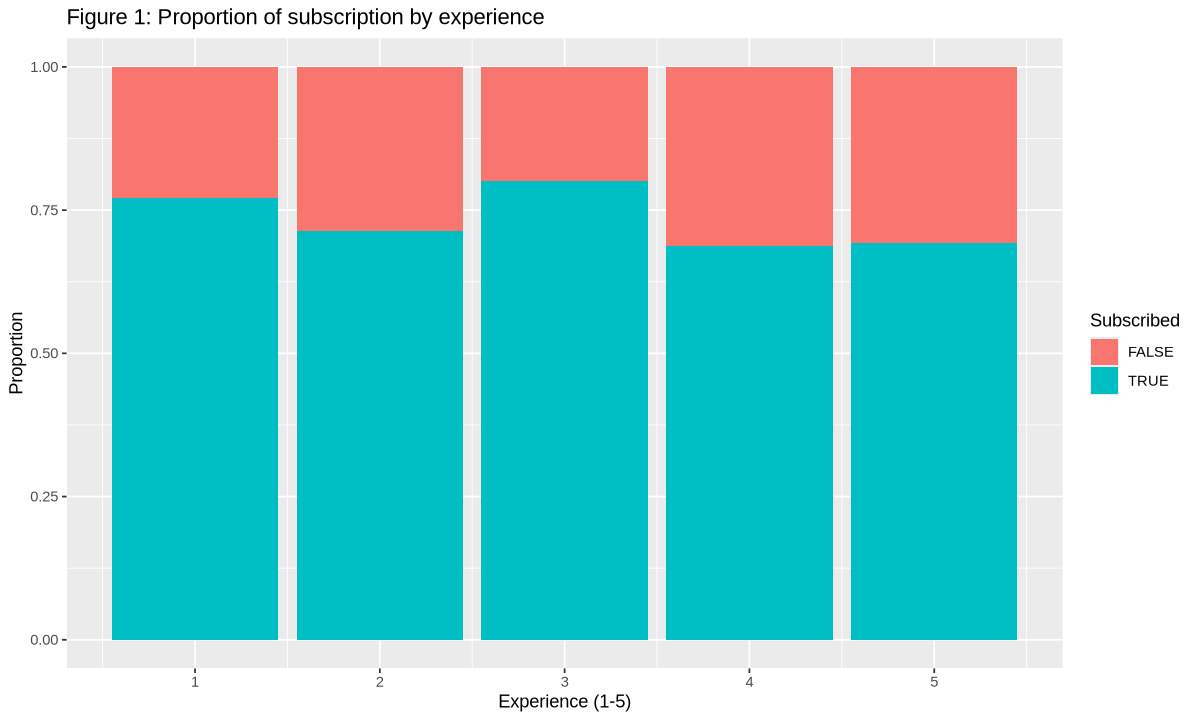

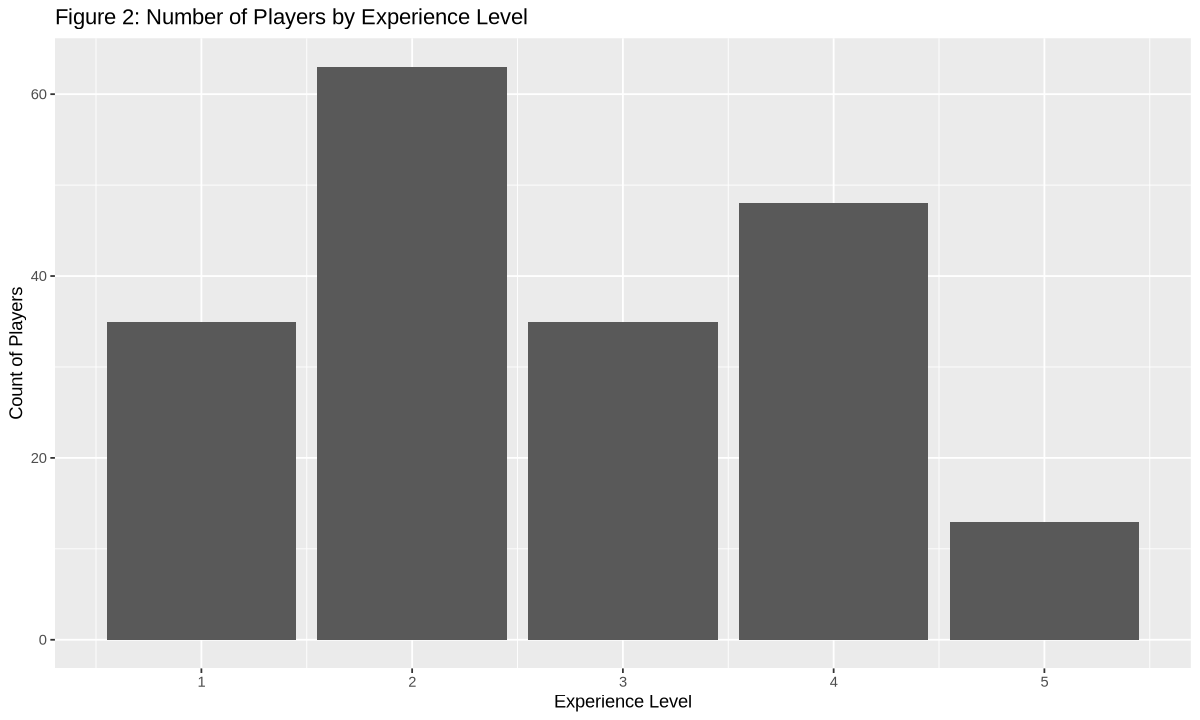

In [20]:
# Figure 1: bar chart of experience vs subscription proportion status
options(repr.plot.width = 10, repr.plot.height = 6)

experience_subscribed_plot <- players |>
  ggplot(aes(x = experience, fill = subscribed)) +
  geom_bar(position = 'fill') +
  labs(x = "Experience (1-5)",
       y = "Proportion",
       fill = "Subscribed",
       title = "Figure 1: Proportion of subscription by experience")

# Figure 2: Player Count by Experience
experience_count_plot <- players |>
    ggplot(aes(x = experience)) + 
        geom_bar(stat = "count") +
        labs(title = "Figure 2: Number of Players by Experience Level",
             x = "Experience Level",
             y = "Count of Players")

experience_subscribed_plot
experience_count_plot

In the first 2 figures, we can observe that eventhough the amount of players per skill level differ, the proportion of the amount that is subscribed to the newsletter is fairly the same. Therefore the skill level of the player doesn't necessarily correlate into a higher rate of subscribing to the newsletter.

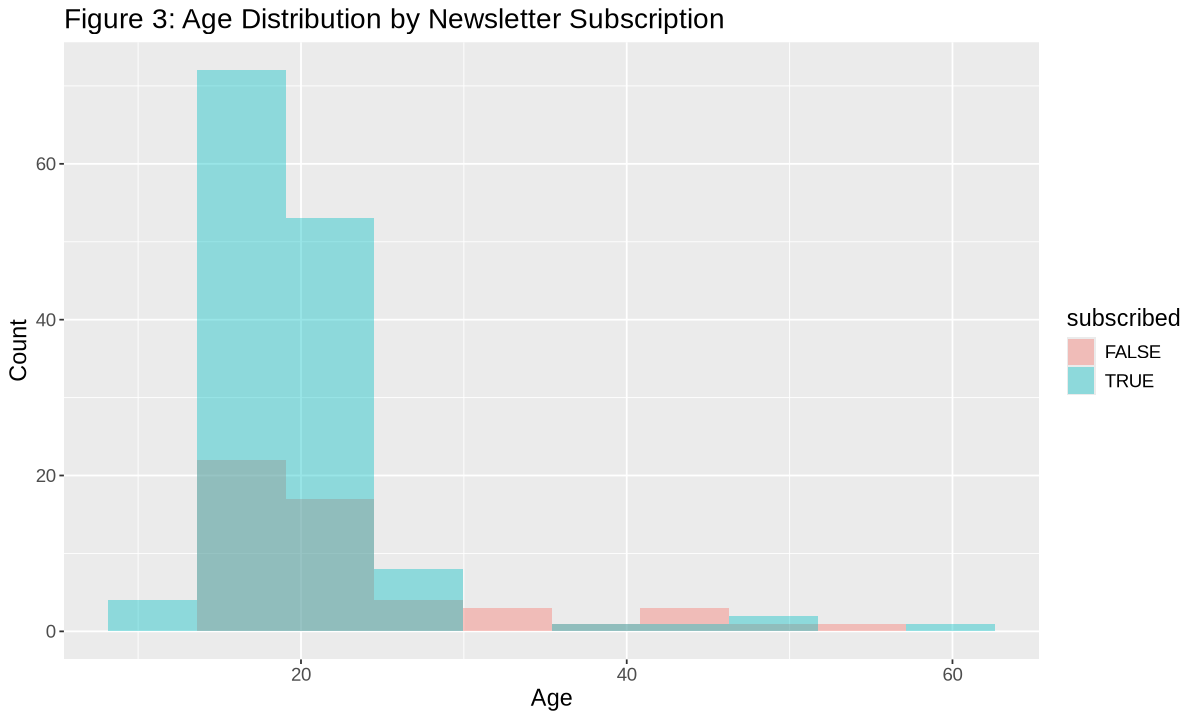

In [22]:
# Figure 3: Player Age Distributions by subscription status
age_plot <- age_distribution_plot <- players |> 
    ggplot(aes(x = age, fill = subscribed)) +
        geom_histogram(position = "identity", alpha = 0.4, bins = 10) +
        labs(title = "Figure 3: Age Distribution by Newsletter Subscription",
               x = "Age",
               y = "Count") +
        theme(text = element_text(size = 14))

age_plot

In Figure 3, we can observe that the most amount of people that have subscribed are around the age of 20 years old. The same is true for the people that aren't subscribed. This is likely due to most minecraft players being part of the younger generation.

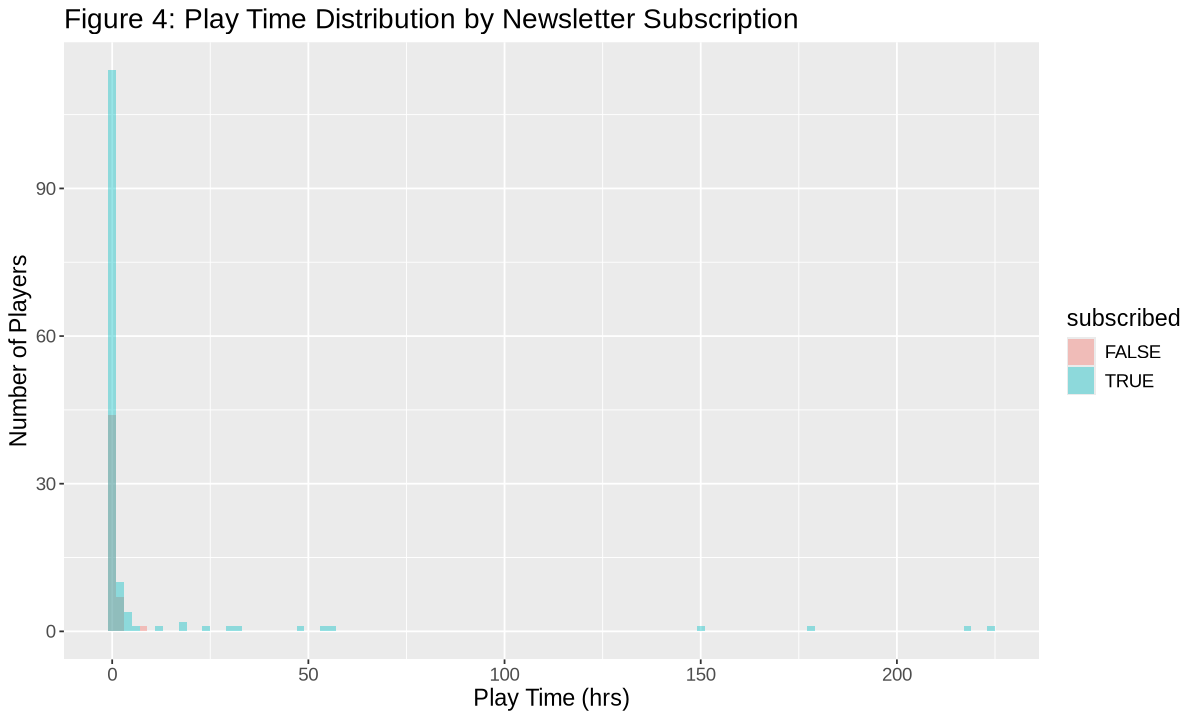

In [23]:
# Figure 4: Play Time Distribution by subscription status
play_time_plot <- players |> 
    ggplot(aes(x = hours_played, fill = subscribed)) +
        geom_histogram(binwidth = 2, position = "identity", alpha = 0.4, bins = 10) +
        labs(title = "Figure 4: Play Time Distribution by Newsletter Subscription",
               x = "Play Time (hrs)",
               y = "Number of Players") +
        theme(text = element_text(size = 14))

play_time_plot

In Figure 4, we observe that the most amount of people that are subscribed to the newsletter have 0 hours played. We can also notice that players who have played the game more than 12.5 hours always tend to subscribe to the newsletter.

## Data Analysis
In this section we'll create different KNN classification models to determine which of the before mentioned features are the most important for determining whether a player is going to subscribe to the newsletter or not. We decided to make a 75/25 train/test data split .

### Finding out the best K

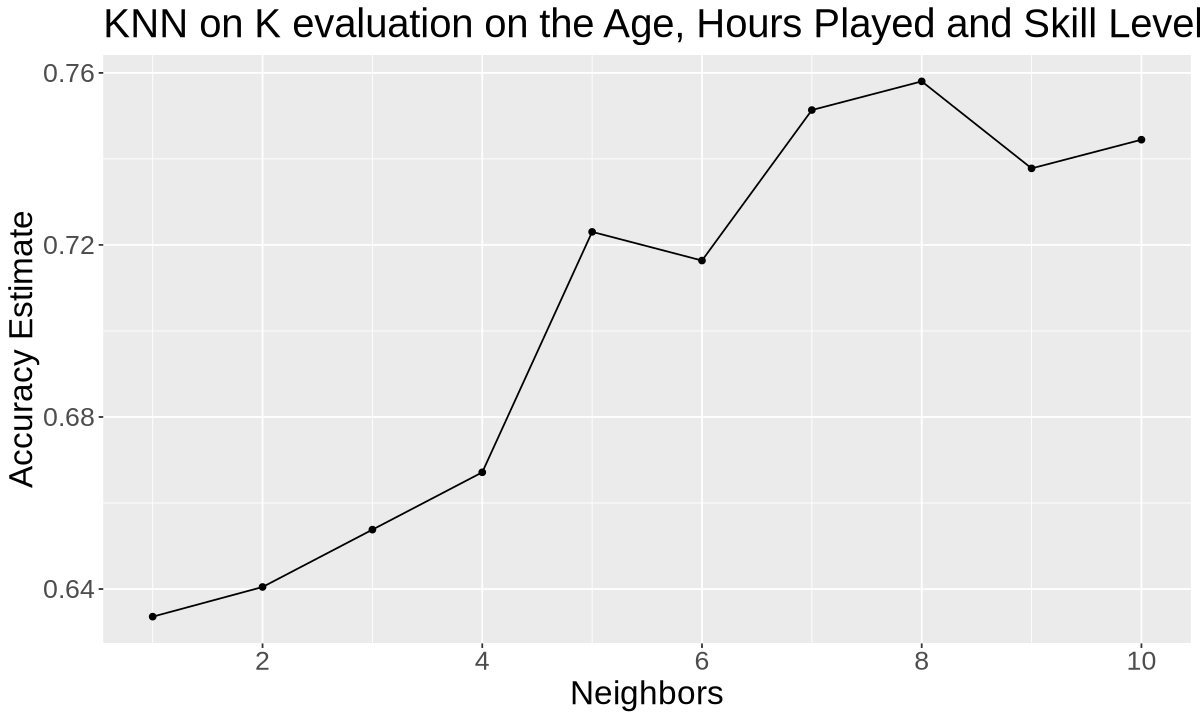

In [7]:
set.seed(4324)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# 5 fold cross validation
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribed)

# Ranging k=1 -> k=10.
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# Making the recipe
players_recipe <- recipe(subscribed ~ ., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Fitting the model
knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_fit |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(title= 'KNN on K evaluation on the Age, Hours Played and Skill Level features.',
                       x = 'Neighbors',
                       y = 'Accuracy Estimate')+
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) 
cross_val_plot

The figure shows us that the model has the highest accuracy when K=7 or K=8. We'll go for K=7, since choosing an odd K will allow the model to avoid cases where there might be ties in the number of neighbors. In other words, an odd K will allow us to have a tiebreaker.

### Age

In [8]:
set.seed(4321)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_age_recipe <- recipe(subscribed ~ age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification")

# Fitting the model
knn_age_fit <- workflow() |>
    add_recipe(players_age_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_age_predictions <- predict(knn_age_fit, players_test) |>
                        bind_cols(players_test)

knn_age_accuracy <- knn_age_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_age_conf_mat <- knn_age_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_age_accuracy
knn_age_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.2857143


          Truth
Prediction FALSE TRUE
     FALSE     2   24
     TRUE     11   12

### Hours played

In [9]:
set.seed(1234)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_time_recipe <- recipe(subscribed ~ hours_played, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_time_fit <- workflow() |>
    add_recipe(players_time_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_time_predictions <- predict(knn_time_fit, players_test) |>
                        bind_cols(players_test)

knn_time_accuracy <- knn_time_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_time_conf_mat <- knn_time_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_time_accuracy
knn_time_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4285714


          Truth
Prediction FALSE TRUE
     FALSE     8   23
     TRUE      5   13

### Experience level

In [10]:
set.seed(2025)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_exp_recipe <- recipe(subscribed ~ experience, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_exp_fit <- workflow() |>
    add_recipe(players_exp_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_exp_predictions <- predict(knn_exp_fit, players_test) |>
                        bind_cols(players_test)

knn_exp_accuracy <- knn_exp_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_exp_conf_mat <- knn_exp_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_exp_accuracy
knn_exp_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.2244898


          Truth
Prediction FALSE TRUE
     FALSE    10   35
     TRUE      3    1

### Age + Hours Played

In [11]:
set.seed(2345)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_age_time_recipe <- recipe(subscribed ~ age + hours_played, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_age_time_fit <- workflow() |>
    add_recipe(players_age_time_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_age_time_predictions <- predict(knn_age_time_fit, players_test) |>
                        bind_cols(players_test)

knn_age_time_accuracy <- knn_age_time_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_age_time_conf_mat <- knn_age_time_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_age_time_accuracy
knn_age_time_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5918367


          Truth
Prediction FALSE TRUE
     FALSE     6   13
     TRUE      7   23

### Age + Experience Level

In [12]:
set.seed(3456)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_age_exp_recipe <- recipe(subscribed ~ age + experience, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_age_exp_fit <- workflow() |>
    add_recipe(players_age_exp_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_age_exp_predictions <- predict(knn_age_exp_fit, players_test) |>
                        bind_cols(players_test)

knn_age_exp_accuracy <- knn_age_exp_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_age_exp_conf_mat <- knn_age_exp_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_age_exp_accuracy
knn_age_exp_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


          Truth
Prediction FALSE TRUE
     FALSE     3    5
     TRUE     10   31

### Hours Played + Experience Level

In [13]:
set.seed(4567)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_time_exp_recipe <- recipe(subscribed ~ hours_played + experience, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_time_exp_fit <- workflow() |>
    add_recipe(players_time_exp_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_time_exp_predictions <- predict(knn_time_exp_fit, players_test) |>
                        bind_cols(players_test)

knn_time_exp_accuracy <- knn_time_exp_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_time_exp_conf_mat <- knn_time_exp_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_time_exp_accuracy
knn_time_exp_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5306122


          Truth
Prediction FALSE TRUE
     FALSE     2   12
     TRUE     11   24

### Age + Hours Played + Experience Level

In [14]:
set.seed(2345)
players_split <- initial_split(players, prop = 0.75, strata = subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

# Making the recipe
players_all_recipe <- recipe(subscribed ~ ., data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Making the spec
# We can just use the spec that was created previously

# Fitting the model
knn_all_fit <- workflow() |>
    add_recipe(players_all_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_all_predictions <- predict(knn_all_fit, players_test) |>
                        bind_cols(players_test)

knn_all_accuracy <- knn_all_predictions |> 
    metrics(truth = subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_all_conf_mat <- knn_all_predictions |>
                        conf_mat(truth = subscribed, estimate = .pred_class) 
knn_all_accuracy
knn_all_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


          Truth
Prediction FALSE TRUE
     FALSE     2    2
     TRUE     11   34

# Discussion

- Summarize what you found
- Discuss whether this is what you expected to find
- Discuss what impact could such findings have
- Discuss what future questions could this lead to

# References
(optional)